# Time Series Decomposition
Decompose your time series data and plot it to uncover seasonality, trends and noise.
- **Seasonality** tells you whether the data displays a clear periodic pattern.
- **Trend** answers whether the data follow a consistent upwards or downward slope.
- **Noise** highlights outlier points or missing values inconsistent with the rest of the data.

In [1]:
# Load packages
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Upload your data as CSV and load as the first data frame
df = pd.read_csv(
    "co2.csv",
    parse_dates=["datestamp"],  # Tell pandas which column(s) to parse as dates
    index_col="datestamp",
)  # Use a date column as your index


In [4]:
# Convert numeric columns
df["co2"] = pd.to_numeric(
    df["co2"],  # Tell pandas which column(s) to make numeric
    errors="coerce",  # If ‘coerce’, then invalid parsing will be set as NaN
)

# Fill missing values
df["co2"] = df["co2"].fillna(method="ffill")  # Choose method to fill missing values
df.head()


,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


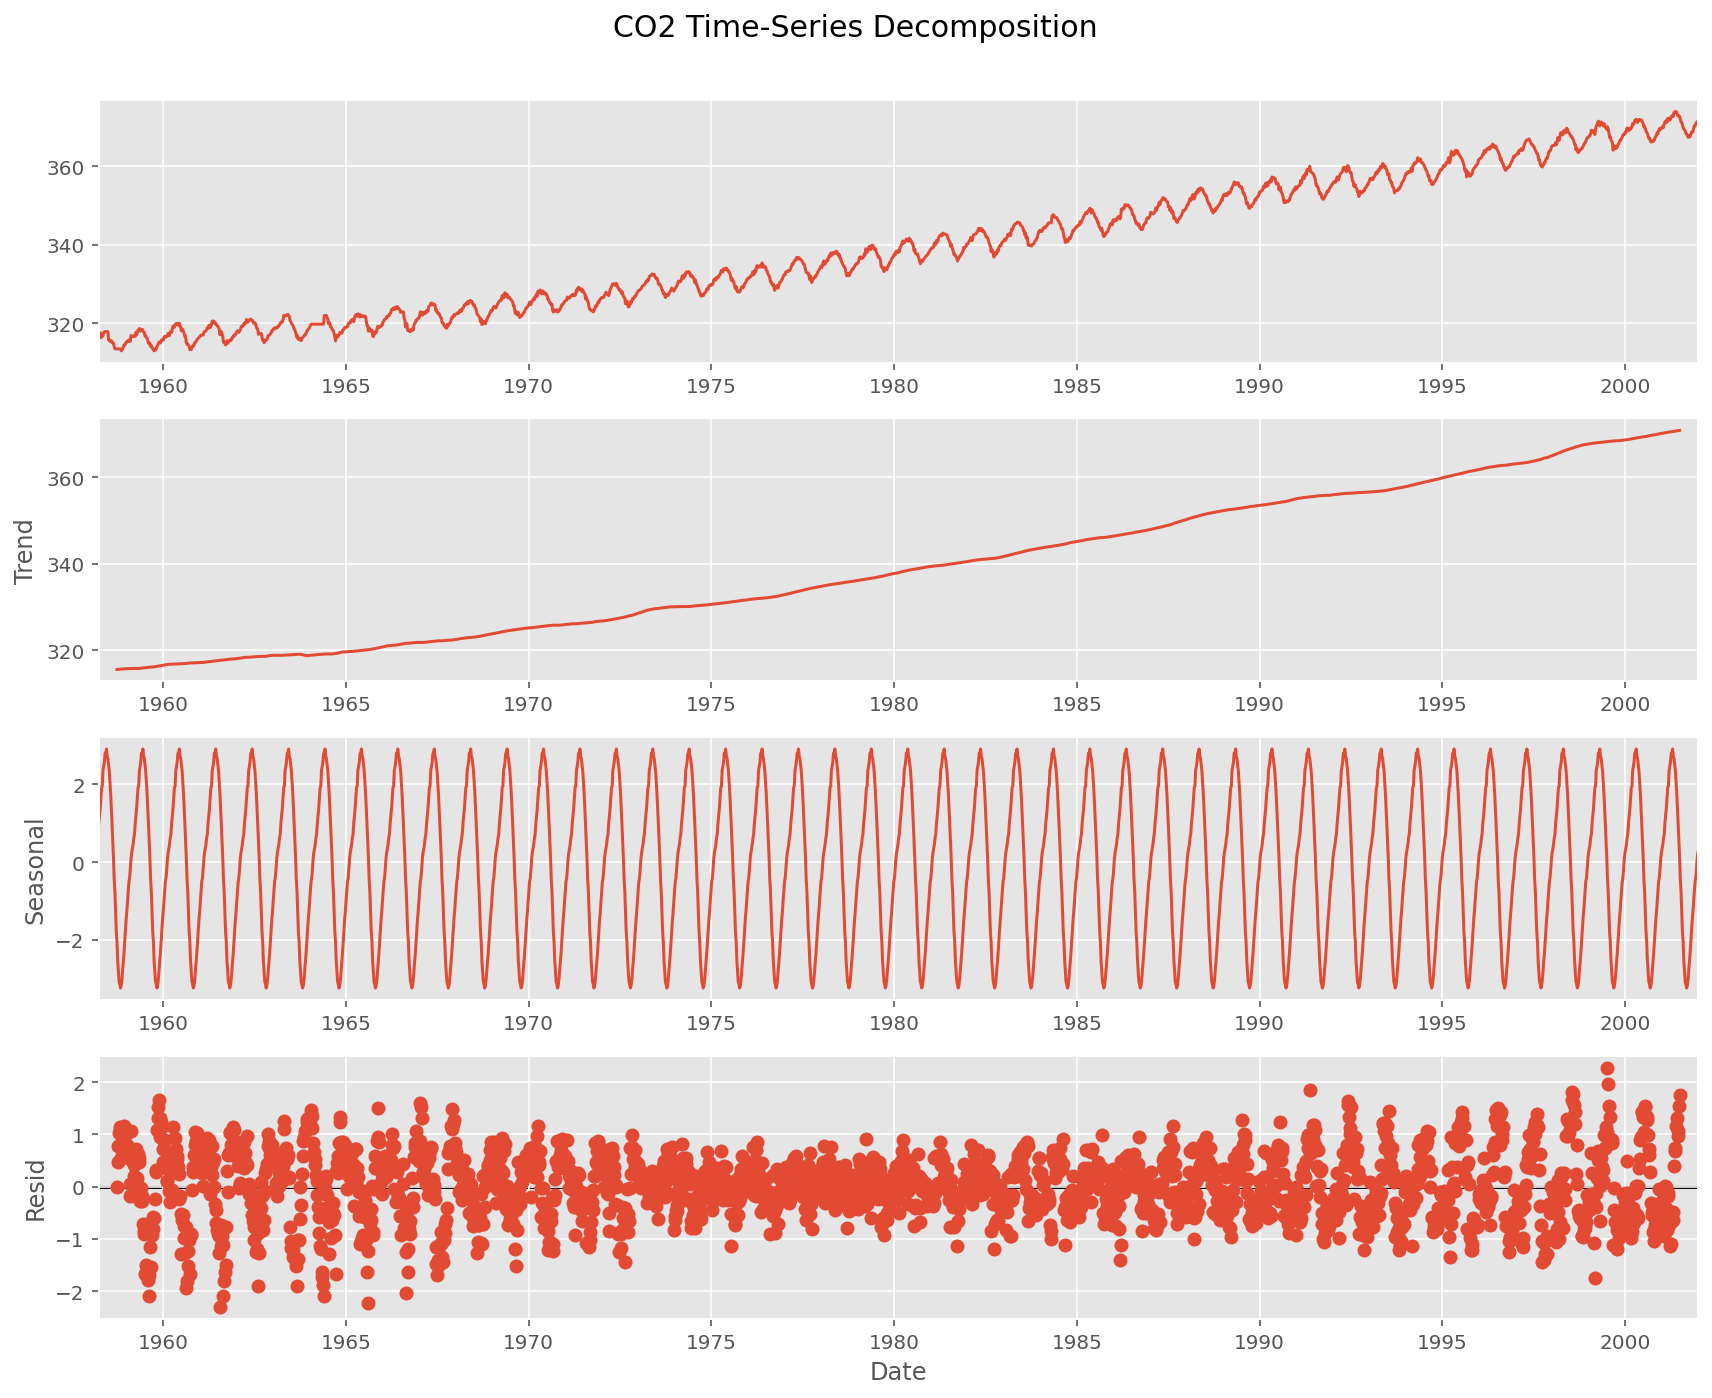

In [7]:
# Plot settings
%config InlineBackend.figure_format='retina'
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = 12, 9  # Figure size (width,height)

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(df)

# Plot decomposition
fig = decomposition.plot()

# Specify axis labels
plt.xlabel("Date", fontsize=12)  # Text and size of xlabel
plt.suptitle(
    "CO2 Time-Series Decomposition",  # Text of title
    y=1.05,  # Position of title
    size=15,  # Size of title
)
plt.show()
